In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
plt.rcParams['figure.figsize'] = (12, 4)
from utils import *
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
data = pd.read_csv('data/data.csv')
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
data = data.sort_index()

In [3]:
data_a2= data.loc[data['variable'] == 'area_2']
data_a2= data_a2.drop(columns='variable')

In [4]:
cleaned_a2= data_a2.dropna()
resampled_a2= cleaned_a2.resample('H').mean()

In [5]:
##week_before
df1= resampled_a2.loc[(resampled_a2.index >= '2005-02-27') & \
                    (resampled_a2.index < '2005-03-06')].reset_index().drop(columns='date').value
##week_after 
df2 = resampled_a2.loc[(resampled_a2.index >= '2005-03-13') & \
                    (resampled_a2.index < '2005-03-20')].reset_index().drop(columns='date').value

df_concat = pd.concat([df1, df2], axis=1)
mean_weeks = df_concat.mean(axis=1)

In [6]:
df4 = resampled_a2.loc[(resampled_a2.index >= '2005-06-13') & \
                    (resampled_a2.index < '2005-06-20')].reset_index().drop(columns='date').value
df5 = resampled_a2.loc[(resampled_a2.index >= '2005-06-27') & \
                    (resampled_a2.index < '2005-07-03')].reset_index().drop(columns='date').value
df_concat = pd.concat([df4, df5], axis=1)
mean_weeks2 = df_concat.mean(axis=1)

In [7]:
df6 = resampled_a2.loc[(resampled_a2.index >= '2005-09-03') & \
                    (resampled_a2.index < '2005-09-10')].reset_index().drop(columns='date').value
df7 = resampled_a2.loc[(resampled_a2.index >= '2005-09-17') & \
                    (resampled_a2.index < '2005-09-24')].reset_index().drop(columns='date').value
df_concat = pd.concat([df6, df7], axis=1)
mean_weeks3 = df_concat.mean(axis=1)

In [8]:
resampled_a2.loc[(resampled_a2.index >= '2005-03-06') & \
                  (resampled_a2.index < '2005-03-13'),'value'] = mean_weeks.values
resampled_a2.loc[(resampled_a2.index >= '2005-06-20') & \
                  (resampled_a2.index < '2005-06-27'),'value'] = mean_weeks2.values
resampled_a2.loc[(resampled_a2.index >= '2005-09-10') & \
                  (resampled_a2.index < '2005-09-17'),'value'] = mean_weeks3.values

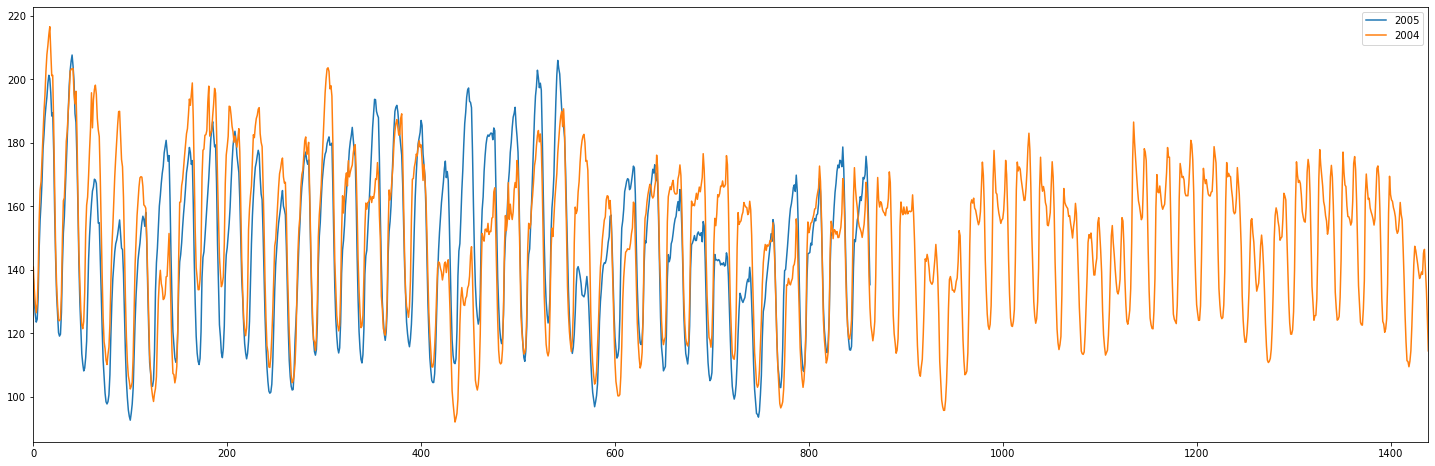

In [9]:
startdate = '2005-09-01'
enddate = '2005-10-31'

(resampled_a2.loc[(resampled_a2.index >= startdate) & \
                    (resampled_a2.index < enddate)].reset_index().value/1.1).plot(figsize=(25,8), label="2005")


startdate = '2004-09-01'
enddate = '2004-10-31'

resampled_a2.loc[(resampled_a2.index >= startdate) & \
                    (resampled_a2.index < enddate)].reset_index().value.plot( label="2004")
plt.legend();

In [10]:
startdate = '2005-09-30'
enddate = '2005-10-06'


y_pred = (resampled_a2.loc[(resampled_a2.index >= startdate) & \
                    (resampled_a2.index < enddate), 'value'] / 1.1 )


startdate = '2004-09-30'
enddate = '2004-10-06'

y_true = (resampled_a2.loc[(resampled_a2.index >= startdate) & \
                    (resampled_a2.index < enddate), 'value'])

mean_absolute_percentage_error(y_true, y_pred)

9.279981923489848

In [11]:
resampled_a2.loc[resampled_a2.index == '2004-10-07 02:00:00', 'value']/1.1

date
2004-10-07 02:00:00    106.927273
Freq: H, Name: value, dtype: float64

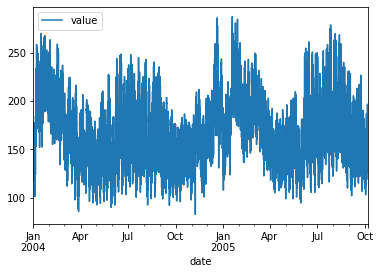

In [12]:
resampled_a2.plot()

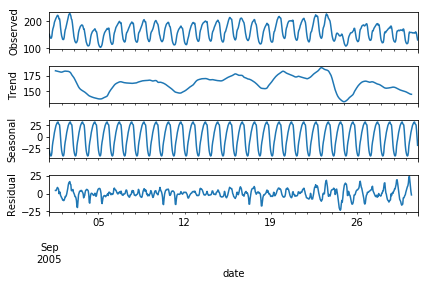

In [13]:
decomposition = seasonal_decompose(resampled_a2['Sept 2005'], model='additive')
decomposition.plot()
plt.show()

In [14]:
acf(resampled_a2)

array([1.        , 0.97004415, 0.89770973, 0.80097544, 0.69349711,
       0.5855442 , 0.48687988, 0.4055781 , 0.34680129, 0.31100233,
       0.29242108, 0.28244645, 0.27545339, 0.27047741, 0.268836  ,
       0.27602979, 0.30053   , 0.34766534, 0.41710495, 0.50360132,
       0.59904676, 0.69369387, 0.77714369, 0.8365226 , 0.85553524,
       0.82390892, 0.75212608, 0.65671344, 0.55052375, 0.44378099,
       0.34647925, 0.26670375, 0.20923741, 0.17409007, 0.15573172,
       0.14585649, 0.13900513, 0.13423498, 0.13286354, 0.14034737,
       0.16471977])

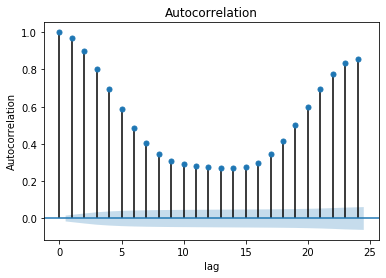

In [50]:
plot_acf(resampled_a2, alpha=.05, lags= 24)
plt.xlabel('lag')
plt.ylabel('Autocorrelation')
plt.show()

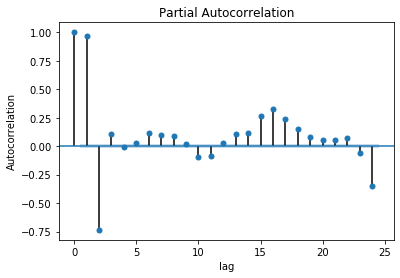

In [49]:
plot_pacf(resampled_a2, alpha=0.05, lags=24, method='ols')
plt.xlabel('lag')
plt.ylabel('Autocorrelation')
plt.show()

In [57]:
try: 
    adfuller(resampled_diff)
except Exception as e:
    print('Nop! And here is why: %s' % e)
    

Nop! And here is why: too many values to unpack (expected 2)


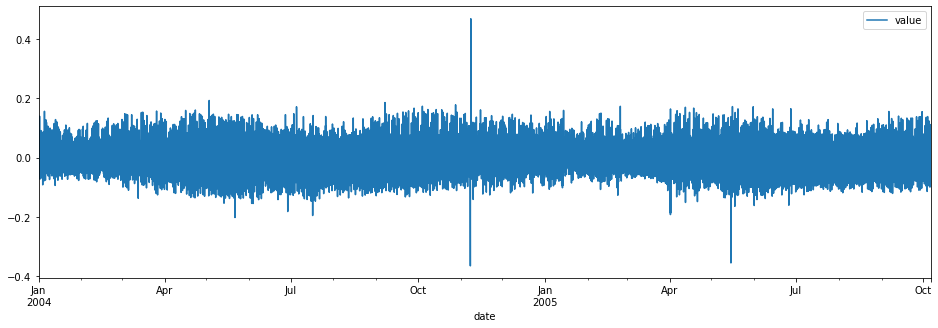

In [18]:
resampled_logged = np.log(resampled_a2)
resampled_diff = resampled_logged.diff()
resampled_diff.plot(figsize=(16, 5))

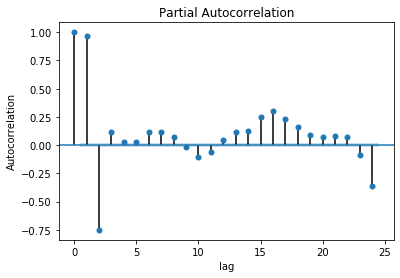

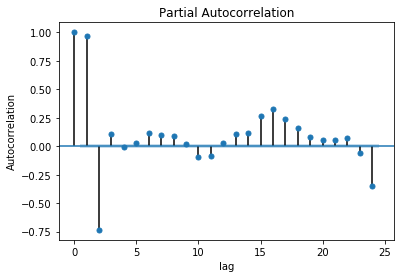

In [54]:
plot_pacf(resampled_logged, alpha=0.05, lags=24, method='ols')
plt.xlabel('lag')
plt.ylabel('Autocorrelation')
plt.show()

plot_pacf(resampled_a2, alpha=.05, lags= 24)
plt.xlabel('lag')
plt.ylabel('Autocorrelation')
plt.show()

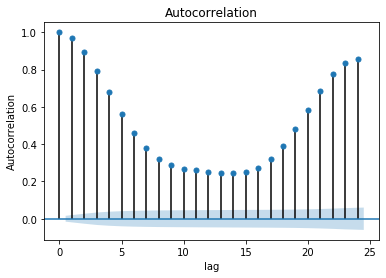

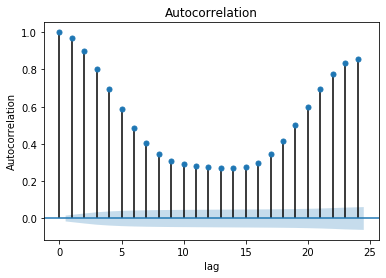

In [55]:
plot_acf(resampled_logged, alpha=.05, lags= 24)
plt.xlabel('lag')
plt.ylabel('Autocorrelation')
plt.show()

plot_acf(resampled_a2, alpha=.05, lags= 24)
plt.xlabel('lag')
plt.ylabel('Autocorrelation')
plt.show()

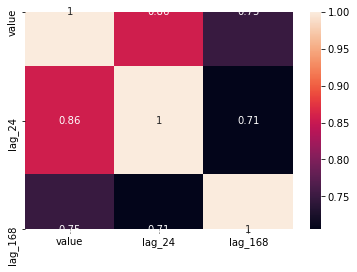

In [19]:
df=resampled_a2.copy()
df['lag_24'] = df['value'].shift(-24)
df['lag_168'] = df['value'].shift(-168)

sns.heatmap(df.corr(), annot=True)

In [20]:
def build_target(series_, number_of_periods_ahead):
    """ 
    takes a series, turns it into a dataframe, and adds a new column called target
    This column is the input series, lagged number_of_periods_ahead into the future
    """
    
    # make a copy 
    series_ = series_.copy()
    series_.name = 'value'
    
    # make a dataframe from the series
    df_ = pd.DataFrame(series_)
    
    # the target column will be the input series, lagged into the future
    df_['target'] = series_.shift(-number_of_periods_ahead)
    return df_

In [21]:
def separate_last_hour(df_):
    
    """
    takes a dataset which has the target and features built 
    and separates it into the last hour
    """
    # take the last period 
    last_period = df_.iloc[-1]
    
    # the last period is now a series, so it's name will be the timestamp
    training_data = df_.loc[df_.index < last_period.name]

    return last_period, training_data

In [22]:
def build_some_features(df_, num_periods_lagged_hours=1,
                        num_periods_lagged_days=1, num_periods_lagged_weeks=1,
                        num_periods_diffed_hours=0,
                        num_periods_diffed_days=0, num_periods_diffed_weeks=0,
                        hour= False, weekday=False, month=False, rolling=[], holidays=False): 
    """
    Builds some features by calculating differences between periods  
    """
    # make a copy 
    df_ = df_.copy()
    
    for i in range(1, num_periods_lagged_hours+1):
        # make a new feature, with the lags in the observed values column
        df_['lagged_%s_hours' % str(i)] = df_['value'].shift(i)
        
    for i in range(1, num_periods_lagged_days+1):
        # make a new feature, with the lags in the observed values column
        df_['lagged_%s_days' % str(i)] = df_['value'].shift(i*24)
        
    for i in range(1, num_periods_lagged_weeks+1):
        # make a new feature, with the lags in the observed values column
        df_['lagged_%s_weeks' % str(i)] = df_['value'].shift(i*168)

    # for a few values, get the diffs  
    for i in range(1, num_periods_diffed_days+1):
        # make a new feature, with the diffs in the observed values column
        df_['diff_%s_days' % str(i)] = df_['value'].diff(i*24)
        
    # for a few values, get the diffs  
    for i in range(1, num_periods_diffed_hours+1):
        # make a new feature, with the diffs in the observed values column
        df_['diff_%s_hours' % str(i)] = df_['value'].diff(i*24)

    # for a few values, get the diffs  
    for i in range(1, num_periods_diffed_weeks+1):
        # make a new feature, with the diffs in the observed values column
        df_['diff_%s_weeks' % str(i)] = df_['value'].diff(i*168)
        
        
    df_['last_year'] = df_['value'].diff(365*24)
           
    for stat in rolling:
        df_['rolling_%s'%str(stat)] = df_['value'].rolling('7D').aggregate(stat)
        
    if hour == True:
        df_['sin_hour'] = np.sin(2*np.pi*df_.index.hour/24)
        df_['cos_hour'] = np.sin(2*np.pi*df_.index.hour/24)
        
    if weekday == True:
        df_['sin_weekday'] = np.sin(2*np.pi*df_.index.weekday/7)
        df_['cos_weekday'] = np.sin(2*np.pi*df_.index.weekday/7)
        
    if month == True:
        df_['sin_month'] = np.sin(2*np.pi*df_.index.month/12)
        df_['cos_month'] = np.sin(2*np.pi*df_.index.month/12)
        
    if holidays == True:
        holidays = df_[((df_.index.month==12) & (df_.index.day==25)) |
                       ((df_.index.month==12) & (df_.index.day==24))
              |((df_.index.month==1) & (df_.index.day==1))].value
        df_['holidays'] = holidays + 1
        df_['holidays'] = df_['holidays'].fillna(0)
        
    mar_to_set = df_[(df_.index.month>=5) & (df_.index.month<=9)].value.isnull()
    df_['mar_to_set'] = mar_to_set+1
    df_['mar_to_set'] = df_['mar_to_set'].fillna(0)
    
    return df_

In [23]:
def separate_train_and_test_set(last_period_, training_data_, target='target'): 
    
    """ 
    separates training and test set (clue was in the name, really... )
    Ok, we were lazy and left the target hardcoded as 'target'. Shame on us. 
    """
    
    # anything that isn't a target is a feature 
    features = [feature for feature in training_data_.columns if feature != target]
    
    # adding a sneaky little dropna to avoid the missing data problem above 
    X_train = training_data_.dropna()[features]
    y_train = training_data_.dropna()[target]
    
    X_last_period = last_period_[features]
    
    return X_train, y_train, X_last_period

In [24]:
def prepare_for_prediction(series_,number_of_periods_ahead,
                           num_periods_lagged_hours, 
                           num_periods_lagged_days, num_periods_lagged_weeks, \
                           num_periods_diffed_hours,
                           num_periods_diffed_days, num_periods_diffed_weeks,
                           hour,
                           weekday,
                           month,
                           rolling,
                           holidays):    
    """ 
    Wrapper to go from the original series to X_train, y_train, X_last_period 
    """
    
    # build the target 
    data_with_target = build_target(series_,
                                    number_of_periods_ahead)
    
    # build the features 
    data_with_target_and_features = build_some_features(data_with_target, 
                                                        num_periods_lagged_hours=num_periods_lagged_hours,
                                                        num_periods_lagged_days=num_periods_lagged_days,
                                                        num_periods_lagged_weeks=num_periods_lagged_weeks,
                                                        num_periods_diffed_hours=num_periods_diffed_hours,
                                                        num_periods_diffed_days=num_periods_diffed_days,
                                                        num_periods_diffed_weeks=num_periods_diffed_weeks,
                                                        weekday=weekday,
                                                        month=month,
                                                        rolling=rolling,
                                                        holidays=holidays)
    # separate train and test data 
    last_period, training_data = separate_last_hour(data_with_target_and_features)

    # separate X_train, y_train, and X_test 
    X_train, y_train, X_last_period = separate_train_and_test_set(last_period,
                                                                  training_data,
                                                                  target='target')
    
    # return ALL OF THE THINGS! (well, actually just the ones we need)
    return X_train, y_train, X_last_period 

In [25]:
def predict_period_n(series_,
                     model, 
                     number_of_periods_ahead, 
                     num_periods_lagged_hours,
                     num_periods_lagged_days, num_periods_lagged_weeks, \
                     num_periods_diffed_hours,
                     num_periods_diffed_days, num_periods_diffed_weeks,
                     hour,
                     weekday,
                     month,
                     rolling,
                     holidays):
    
    X_train, y_train, X_last_period = prepare_for_prediction(series_=series_,
                                                             number_of_periods_ahead=number_of_periods_ahead, 
                                                             num_periods_lagged_hours=num_periods_lagged_hours,
                                                             num_periods_lagged_days=num_periods_lagged_days,
                                                             num_periods_lagged_weeks=num_periods_lagged_weeks,
                                                             num_periods_diffed_hours=num_periods_diffed_hours,
                                                             num_periods_diffed_days=num_periods_diffed_days,
                                                             num_periods_diffed_weeks=num_periods_diffed_weeks,
                                                             hour=hour,
                                                             weekday=weekday,
                                                             month=month,
                                                             rolling=rolling,
                                                             holidays=holidays)
    model.fit(X_train, y_train)
    
    return model.predict(X_last_period.values.reshape(1, -1))

In [26]:
def predict_n_periods(series_, n_periods, model, \
                      num_periods_lagged_hours=1,
                      num_periods_lagged_days=1,
                      num_periods_lagged_weeks=1,
                      num_periods_diffed_hours=0,
                      num_periods_diffed_days=0,
                      num_periods_diffed_weeks=0,
                  hour = True, weekday=True, month=True,rolling=[], holidays=False):
    
    predictions = []

    for period_ahead in range(1, n_periods+1):
        pred = predict_period_n(series_=series_, 
                                model=model, 
                                number_of_periods_ahead=period_ahead, 
                                num_periods_lagged_hours=num_periods_lagged_hours,
                                num_periods_lagged_days=num_periods_lagged_days,
                                num_periods_lagged_weeks=num_periods_lagged_weeks,
                                num_periods_diffed_hours=num_periods_diffed_hours,
                                num_periods_diffed_days=num_periods_diffed_days,
                                num_periods_diffed_weeks=num_periods_diffed_weeks,
                                hour=hour,
                                weekday=weekday,
                                month=month,
                                rolling=rolling,
                                holidays=holidays)
        predictions.append(pred[0])

    return predictions

In [42]:
data_train = resampled_a2.copy()[:-168]
data_val= resampled_a2.copy()[-168:]
X=data_train[['value']]

df=data_train.drop(columns='value')
minmaxscaler = MinMaxScaler(feature_range=(-1,1))
normalized= minmaxscaler.fit_transform(data_train)
data_train['value'] = normalized

In [43]:
minmaxscaler.scale_

array([0.0097735])

In [44]:
predictions_area_2 = predict_n_periods(series_=data_train.value, n_periods=168, model=LinearRegression(), \
                  num_periods_lagged_hours=4, num_periods_lagged_days=2, num_periods_lagged_weeks=1, \
                  num_periods_diffed_hours=4, num_periods_diffed_days=2, num_periods_diffed_weeks=1,
                  hour = True, weekday=True, month=True, rolling=['mean'], holidays=True)

In [45]:
re_scale_preds = minmaxscaler.inverse_transform(np.array(predictions_area_2).reshape(-1, 1))

In [46]:
test_2 = pd.DataFrame(re_scale_preds,index=pd.date_range(start='2005-09-30', end='2005-10-07', freq='h')[:-1])

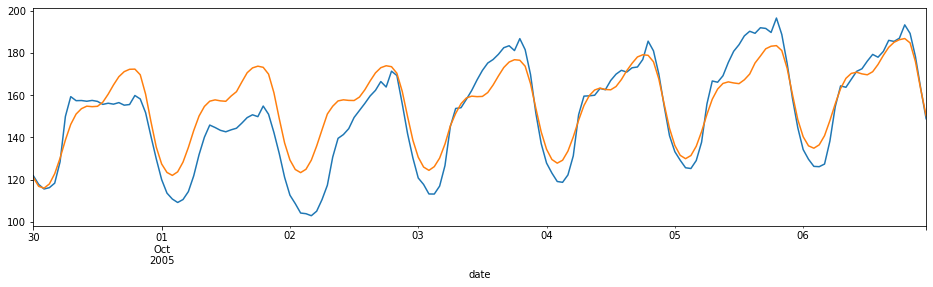

In [47]:
resampled_a2.loc['30 September 2005':'07 October 2005'].value.plot(figsize=(16,4))
test_2[0].plot();

In [48]:
mean_absolute_percentage_error(resampled_a2[-168:], test_2)

6.380080024188739